In [2]:
import pandas as pd 

In [11]:
df = pd.read_csv("palm_ffb.csv")

In [12]:
df

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [10]:
print(df.describe())

       SoilMoisture  Average_Temp    Min_Temp    Max_Temp  Precipitation  \
count    130.000000    130.000000  130.000000  130.000000     130.000000   
mean     527.646923     26.849918   21.379231   33.851538     188.980769   
std       57.367844      0.651413    0.688971    1.079638      80.237210   
min      380.700000     25.158065   18.900000   31.100000       2.000000   
25%      488.625000     26.442285   21.000000   33.100000     140.300000   
50%      538.300000     26.930645   21.500000   33.900000     182.150000   
75%      571.025000     27.270726   21.800000   34.600000     226.100000   
max      647.300000     28.580000   22.600000   36.000000     496.100000   

       Working_days   HA_Harvested   FFB_Yield  
count    130.000000     130.000000  130.000000  
mean      24.753846  793404.491565    1.602231  
std        1.239289   34440.893854    0.281751  
min       21.000000  683431.944400    1.080000  
25%       24.000000  768966.949100    1.390000  
50%       25.000000  

In [14]:
from scipy.stats import spearmanr

# Correlation analysis
correlation_matrix = df.corr(method='spearman')

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  \
SoilMoisture       1.000000     -0.611158  0.008096 -0.465575       0.534844   
Average_Temp      -0.611158      1.000000  0.150144  0.735619      -0.313273   
Min_Temp           0.008096      0.150144  1.000000 -0.164203       0.368256   
Max_Temp          -0.465575      0.735619 -0.164203  1.000000      -0.427017   
Precipitation      0.534844     -0.313273  0.368256 -0.427017       1.000000   
Working_days      -0.055768      0.063742 -0.010767 -0.025549       0.076471   
HA_Harvested      -0.346520      0.496968 -0.016674  0.330195      -0.276535   
FFB_Yield         -0.053962     -0.036249  0.084286 -0.110524       0.311944   

               Working_days  HA_Harvested  FFB_Yield  
SoilMoisture      -0.055768     -0.346520  -0.053962  
Average_Temp       0.063742      0.496968  -0.036249  
Min_Temp          -0.010767     -0.016674   0.084286  
Max_Temp          -0.025549      0.330

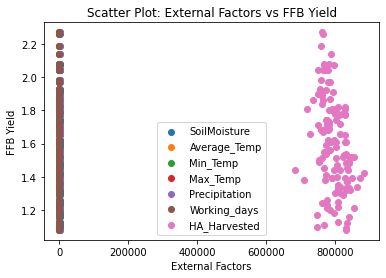

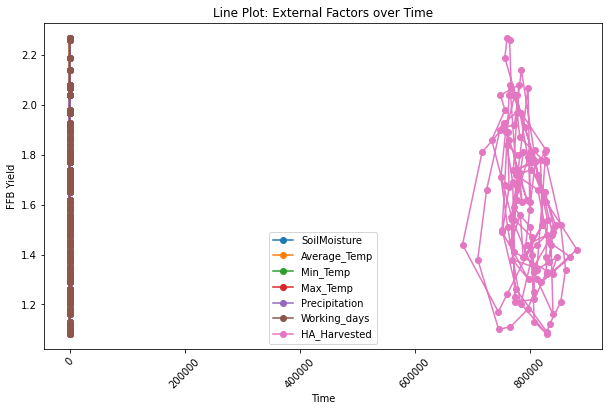

In [18]:
import matplotlib.pyplot as plt

external_factors = ['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days', 'HA_Harvested']
ffb_yield = 'FFB_Yield'

# Create scatter plots
for factor in external_factors:
    plt.scatter(df[factor], df[ffb_yield], label=factor)

plt.xlabel('External Factors')
plt.ylabel('FFB Yield')
plt.title('Scatter Plot: External Factors vs FFB Yield')
plt.legend()
plt.show()

# Create line plots
plt.figure(figsize=(10, 6))
for factor in external_factors:
    plt.plot(df[factor], df[ffb_yield], label=factor, marker='o')

plt.xlabel('Time')
plt.ylabel('FFB Yield')
plt.title('Line Plot: External Factors over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Extract the features and target variable
features = [ 'Working_days', 'HA_Harvested']
target = 'FFB_Yield'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.07624048883152922
R-squared: 0.1222113521264272


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[['SoilMoisture','Min_Temp', 'Precipitation', 'HA_Harvested']]
y = df['FFB_Yield']
# Fit random forest regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)

# Predict using the random forest regression model
y_pred = rf_reg.predict(X)

# Calculate MSE and R-squared
mse = mean_squared_error(y, y_pred)
r_squared = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 0.006268426230769233
R-squared: 0.9204238910252543


### Summary 

using linear regresion the mse and r-sqared value is 0.07624048883152922 and  0.1222113521264272<br>
which have low mse rate but low r-squared that not good enough,<br>
otherside using random forest regression the mse and r-squared value is 0.006268426230769233 and 0.9204238910252543<br>
which compared with linear regresion have far lower mse rate and far higher r-squared value that indicated external factor have <br>strong influence in FBB field.  